In [28]:
# all imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# data visualisation
housing = fetch_california_housing()
print(housing.feature_names)
print(housing.data.shape)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 8)


In [29]:
# directory check
os.makedirs("models", exist_ok=True)

In [9]:
# train, test and val split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [10]:
# regularise
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
# seed
np.random.seed(42)
tf.random.set_seed(42)

Epoch 1/20


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1122 - mae: 0.9962 - val_loss: 1.4269 - val_mae: 0.7085
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7242 - mae: 0.6390 - val_loss: 0.6105 - val_mae: 0.5835
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6118 - mae: 0.5780 - val_loss: 0.5465 - val_mae: 0.5454
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5594 - mae: 0.5478 - val_loss: 0.5054 - val_mae: 0.5203
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5205 - mae: 0.5261 - val_loss: 0.4761 - val_mae: 0.5014
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4917 - mae: 0.5100 - val_loss: 0.4567 - val_mae: 0.4873
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4704 - mae: 0.4979 - val_loss: 0.4436 - val_mae: 0.4771
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4547 - mae: 0.4886 - val_loss: 0.4343 - val_mae: 0.4694
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4427 

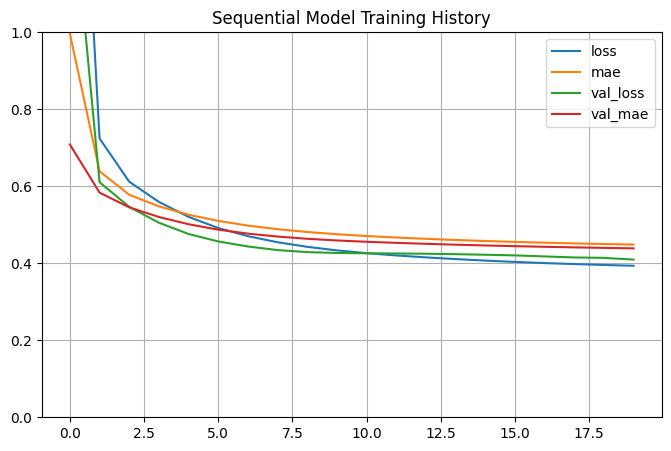

In [30]:
# Sequential model
seq_model = keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[X_train.shape[1]]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

# introduce loss
seq_model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["mae"]
)

# fit
seq_history = seq_model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

mae_test = seq_model.evaluate(X_test, y_test)
print(f"Sequential model MAE: {mae_test}")

pd.DataFrame(seq_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Sequential Model Training History")
plt.show()

# save
seq_model.save("models/sequential_model.keras")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer[0][0… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0290 - mean_absolute_error: 1.0592 - val_loss: 0.7211 - val_mean_absolute_error: 0.5483
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5871 - mean_absolute_error: 0.5463 - val_loss: 0.5397 - val_mean_absolute_error: 0.5226
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5532 - mean_absolute_error: 0.5371 - val_loss: 0.5495 - val_mean_absolute_error: 0.5168
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5332 - mean_absolute_error: 0.5284 - val_loss: 0.4924 - val_mean_absolute_error: 0.5052
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5188 - mean_absolute_error: 0.5213 - val_loss: 0.4882 - val_mean_absolute_error: 0.4997
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5044 - mean_absolute_error: 0.5143 - val_loss: 0.4702 - val_mean_absolute_error: 0.4929
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4925 - mean_absolute_error: 0.5

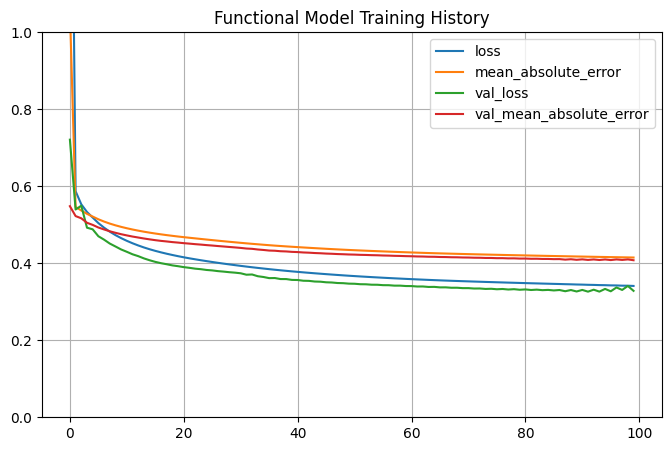

In [31]:
# Functional API model
keras.backend.clear_session()

inputs = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(inputs)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([inputs, hidden2])
outputs = keras.layers.Dense(1)(concat)

func_model = keras.Model(inputs=inputs, outputs=outputs)
func_model.summary()

func_model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=[keras.metrics.MeanAbsoluteError()]
)

func_history = func_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid)
)

mae_test = func_model.evaluate(X_test, y_test)
print(f"Functional model MAE: {mae_test}")

pd.DataFrame(func_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Functional Model Training History")
plt.show()

# Save 
func_model.save("models/functional_model.keras")


In [32]:
# test saved models
loaded_seq = keras.models.load_model("models/sequential_model.keras")
loaded_func = keras.models.load_model("models/functional_model.keras")

X_new = X_test[:3]
y_pred_seq = loaded_seq.predict(X_new)
y_pred_func = loaded_func.predict(X_new)

print("Sequential predictions:", y_pred_seq.flatten())
print("Functional predictions:", y_pred_func.flatten())
print("Actual values:", y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Sequential predictions: [0.8196797 1.7547013 3.616116 ]
Functional predictions: [0.7863914 1.56624   4.362575 ]
Actual values: [0.477   0.458   5.00001]


In [33]:
# checkpoints
keras.backend.clear_session()

callback_model = keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

callback_model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

# Save every epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "models/model-{epoch:02d}.keras"
)

callback_model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb]
)

Epoch 1/30
  1/363 ━━━━━━━━━━━━━━━━━━━━ 50s 141ms/step - loss: 8.6735

c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0538 - val_loss: 1.0076
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7593 - val_loss: 0.6584
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6678 - val_loss: 0.6064
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6162 - val_loss: 0.5654
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5771 - val_loss: 0.5310
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5456 - val_loss: 0.5024
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5195 - val_loss: 0.4781
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4979 - val_loss: 0.4581
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4803 - val_loss: 0.4423
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4660 - val_loss: 0.4296
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4544 - val_loss: 0.4197
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

In [34]:
# save best model
keras.backend.clear_session()

early_model = keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

early_model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "models/early_stop_model.keras", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

early_model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4358 - val_loss: 1.9490
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8268 - val_loss: 0.7032
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6656 - val_loss: 0.6282
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6072 - val_loss: 0.6224
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5670 - val_loss: 0.5906
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5353 - val_loss: 0.5633
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5099 - val_loss: 0.5243
Epoch 8/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4891 - val_loss: 0.5135
Epoch 9/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4722 - val_loss: 0.4759
Epoch 10/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4583 - val_loss: 0.4601
Epoch 11/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4468 - val_loss: 0.4492
Epoch 12/200
363/363 ━━━━━━━━━━━━━━━━━━━━

In [35]:
# Load best model
best_model = keras.models.load_model("models/early_stop_model.keras")
mse_test = best_model.evaluate(X_test, y_test)
print(f"Best early-stop model MSE: {mse_test}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3132
Best early-stop model MSE: 0.313247412443161
